### 1.Introduction

In the field of Natural Language Processing (NLP), text classification is a crucial task with wide applications. Specifically, the automated classification of news articles plays a significant role in efficiently organizing large amounts of information and delivering relevant content to users. This project focuses on the BBC News Classification task as part of a Kaggle competition, where news articles are categorized into distinct groups such as "Business," "Sports," "Entertainment," and more.

#### Objective
The goal of this project is to build a model capable of categorizing BBC news articles into predefined categories. The main approach employed in this project is matrix factorization for unsupervised learning to predict the categories of the news articles. Additionally, a comparison with supervised learning methods will be performed to evaluate the performance and efficiency of both approaches.


### 2. Exploratory Data Analysis (EDA)

#### 2-1. Load and Inspect the Data

I begin by loading the training and test datasets and inspecting their basic structure. This helps me understand the types of data I am dealing with and check for any missing or inconsistent values.

In [2]:
import pandas as pd

# Load the training and test datasets
train_data = pd.read_csv('learn-ai-bbc/BBC News Train.csv')
test_data = pd.read_csv('learn-ai-bbc/BBC News Test.csv')

# Display the first few rows of the training data
print(train_data.head())
print(train_data.info())
print(test_data.info())

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  7

From this inspection, I can see that the dataset contains `ArticleId`, `Text`, and `Category` columns. The `Category` column represents the target variable, which I will attempt to predict.

#### 2-2. Check for Missing Values

Next, I check for missing data to ensure that there are no gaps in the dataset. Any missing data will need to be handled either by imputation or removal.

In [3]:
# Check for missing values in the datasets
print(train_data.isnull().sum())
print(test_data.isnull().sum())

ArticleId    0
Text         0
Category     0
dtype: int64
ArticleId    0
Text         0
dtype: int64


Luckily, there are no missing values in either dataset, so I can proceed to the next step.

#### 2-3. Visualize the Data Distribution

To better understand the target variable (`Category`), I visualize the distribution of categories in the training dataset.


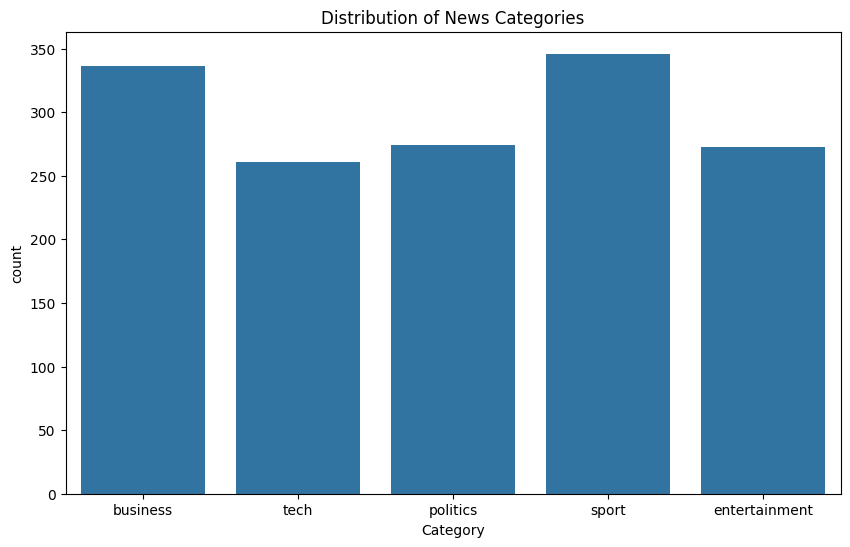

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target labels
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=train_data)
plt.title('Distribution of News Categories')
plt.show()

From the plot, I observe that the categories are fairly balanced, though some categories may have slightly more articles than others. This is important because imbalanced classes could impact model performance.


#### 2-4. Text Preprocessing

Before applying any machine learning models, I need to clean the text data. This involves several steps:
- Lowercasing all text
- Removing punctuation and numbers
- Removing stopwords (common but unimportant words such as "the", "is")
- Lemmatizing words (converting words to their base form)

In [5]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text

# Apply preprocessing to the training data
train_data['cleaned_text'] = train_data['Text'].apply(preprocess_text)

Display Original and Cleaned Text

In [6]:
# Function to limit the length of the text displayed
def shorten_text(text, max_length=100):
    if len(text) > max_length:
        return text[:max_length] + "..."
    return text

# Compare the original text and the cleaned text
for i in range(3):  # Display the first 3 articles
    print("Original Text:")
    print(shorten_text(train_data['Text'].iloc[i]))
    print("\nCleaned Text:")
    print(shorten_text(train_data['cleaned_text'].iloc[i]))
    print("\n" + "="*80 + "\n")


Original Text:
worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a ba...

Cleaned Text:
worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud ch...


Original Text:
german business confidence slides german business confidence fell in february knocking hopes of a sp...

Cleaned Text:
german business confidence slide german business confidence fell february knocking hope speedy recov...


Original Text:
bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ...

Cleaned Text:
bbc poll indicates economic gloom citizen majority nation surveyed bbc world service poll believe wo...




Display Word Frequency

Most common words:
[('said', 4838), ('mr', 2006), ('year', 1853), ('would', 1711), ('also', 1426), ('new', 1334), ('people', 1323), ('u', 1227), ('one', 1190), ('could', 1032)]


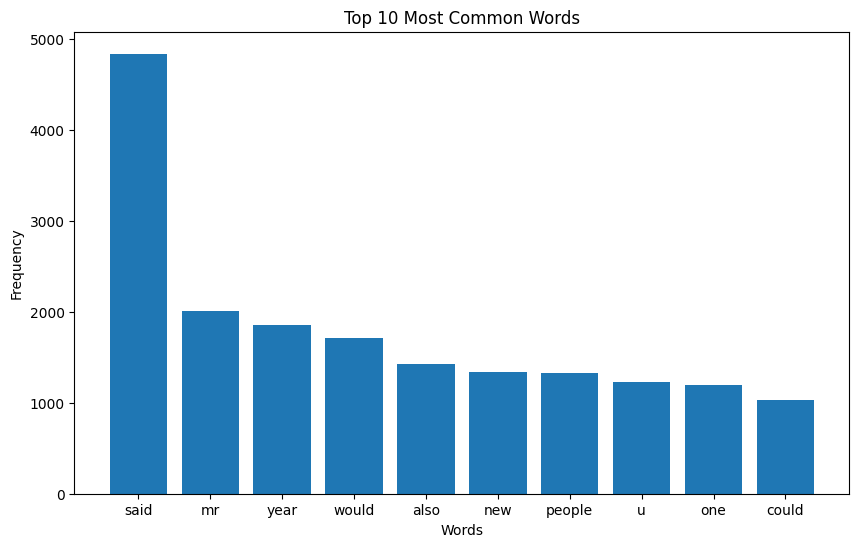

In [7]:
from collections import Counter

# Combine all cleaned text and count word occurrences
all_words = ' '.join(train_data['cleaned_text']).split()
word_freq = Counter(all_words)

# Display the 10 most common words
print("Most common words:")
print(word_freq.most_common(10))

import matplotlib.pyplot as plt

# Get the top 10 most common words and their frequencies
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)

# Plot a bar chart to show word frequency
plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


#### 2-5. Analysis Plan
Based on the insights gained from the EDA:
- The dataset is relatively balanced across categories, meaning no major adjustments for class imbalance are necessary.
- The distribution of article lengths suggests that the articles are relatively uniform in complexity.
- Frequent words analysis indicates that common words in the dataset are typical for news articles, but further feature extraction (e.g., TF-IDF or word embeddings) will help capture more meaningful distinctions between articles.

For feature extraction, I plan to use **TF-IDF (Term Frequency-Inverse Document Frequency)**. TF-IDF helps convert raw text into numerical features by assigning higher weights to words that are frequent in a specific article but not common across all articles, thus highlighting important terms.


### 3. Feature Extraction

In this section, I will extract numerical features from the text data, which can be used for model building. I will use the **TF-IDF (Term Frequency-Inverse Document Frequency)** method, a popular technique for converting textual data into numerical vectors.

#### 3-1. Why TF-IDF?
TF-IDF assigns importance to words based on their frequency in a specific document relative to their frequency across all documents. The key idea is to emphasize words that are unique to a document and downweight common words that appear in many documents. This helps capture the uniqueness of each article and reduces the influence of common but uninformative words.

The formula for TF-IDF is as follows:
- **TF (Term Frequency)**: Measures how frequently a word appears in a document. The more frequent, the higher the score.
  
  $$
  TF(w) = \frac{\text{Number of times word w appears in a document}}{\text{Total number of words in the document}}
  $$

- **IDF (Inverse Document Frequency)**: Measures how important a word is across all documents. Words that appear in many documents receive a lower score, while words that appear in few documents receive a higher score.

  $$
  IDF(w) = \log \frac{\text{Total number of documents}}{\text{Number of documents containing word w}}
  $$

The TF-IDF score for a word is the product of its TF and IDF scores:
$$
TF\text{-}IDF(w) = TF(w) \times IDF(w)
$$



#### 3-2. Implementing TF-IDF

I will now apply TF-IDF to the cleaned text data to extract features that can be used for both unsupervised and supervised models.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply TF-IDF to the cleaned training text
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['cleaned_text'])

# Transform the test data as well
X_test_tfidf = tfidf_vectorizer.transform(test_data['Text'].apply(preprocess_text))


#### 3-3. Exploring the TF-IDF Features

To better understand the feature extraction process, let's inspect some of the resulting TF-IDF features. I will print out the top TF-IDF features (words) from a sample document and visualize their corresponding TF-IDF scores.


In [9]:
# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the TF-IDF vector for a sample document
sample_tfidf_vector = X_train_tfidf[0]

# Convert the sparse vector to a dense format for easier inspection
dense_vector = sample_tfidf_vector.todense().tolist()[0]

# Get the top 10 words with the highest TF-IDF scores
tfidf_scores = [(feature_names[i], dense_vector[i]) for i in range(len(dense_vector))]
tfidf_scores_sorted = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 words and their TF-IDF scores
print("Top 10 words with highest TF-IDF scores in the first document:")
for word, score in tfidf_scores_sorted:
    print(f"{word}: {score}")

Top 10 words with highest TF-IDF scores in the first document:
worldcom: 0.532520986950467
accounting: 0.37623641852751155
ebbers: 0.3712346255001182
cooper: 0.23997508038780171
fraud: 0.18549683293966726
mr: 0.14592189212115983
lawyer: 0.1346532675126353
mci: 0.12178069562512912
auditor: 0.11998754019390086
witness: 0.11681075873930186


#### 3-4. Visualization of TF-IDF Scores

To visualize the importance of words based on their TF-IDF scores, I will plot the top 10 words with the highest scores from the first article in the training dataset.


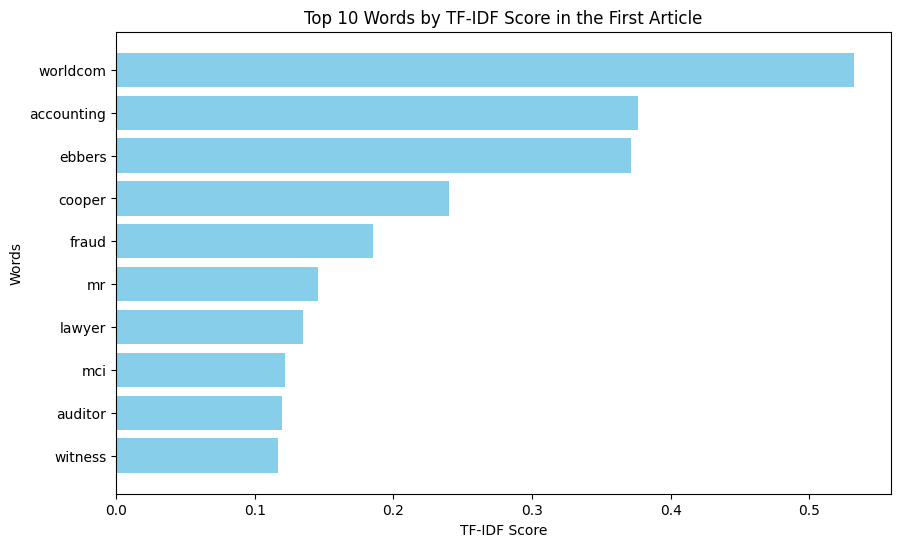

In [10]:
# Extract words and scores from the sorted TF-IDF list
words, scores = zip(*tfidf_scores_sorted)

# Plot the top 10 words by TF-IDF score
plt.figure(figsize=(10,6))
plt.barh(words, scores, color='skyblue')
plt.title('Top 10 Words by TF-IDF Score in the First Article')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()

The TF-IDF feature extraction reveals the most important words in the first document based on their uniqueness and relevance. The top words are:

- **worldcom**: 0.5325
- **accounting**: 0.3762
- **ebbers**: 0.3712
- **cooper**: 0.2400
- **fraud**: 0.1855

#### 3-5. Analysis of the Results
From the visualization, I observe that the top-scoring words are directly related to a specific event or context — in this case, terms related to **WorldCom** and **accounting fraud**. This suggests that TF-IDF is successfully identifying key terms that define the subject of the article.

- **Worldcom**: This word has the highest TF-IDF score, indicating it is a critical term in this document but less common across the other articles in the dataset.
- **Accounting** and **Fraud**: These terms, while commonly associated with financial discussions, appear to be weighted higher in this particular article, reflecting their relevance to the topic.
- **Ebbers** and **Cooper**: These are likely to be names of individuals closely related to the subject matter of the article, further emphasizing the TF-IDF model's ability to prioritize important entities.

##### Importance for Feature Extraction
This analysis shows how TF-IDF emphasizes words that are both unique to individual documents and relevant to their content. This is particularly useful for classification tasks where the goal is to distinguish between articles on different topics.

In this case, words related to **fraud** and **accounting scandals** are given higher weight, which will likely help the model categorize the article under a relevant category, such as "Business" or "Finance."

##### Implications for Model Building
TF-IDF plays a crucial role in ensuring that the model focuses on terms that are most relevant for differentiating between categories. The ability to capture specific, high-value terms like **worldcom** and **accounting** means the model will likely perform better at distinguishing articles about corporate scandals from other topics.

Moving forward, the extracted features will be used to train both supervised and unsupervised models. Since the TF-IDF method assigns importance to terms based on their relevance to individual documents, it will provide a strong foundation for building accurate classifiers, especially when combined with appropriate machine learning algorithms.


### 4. Model Building and Training

In this section, I will build two models: an **unsupervised learning model** using Matrix Factorization and a **supervised learning model** for classification. The goal is to compare their performance in categorizing the news articles.

#### 4-1. Unsupervised Learning: Matrix Factorization (NMF)

Matrix factorization techniques, such as **Non-negative Matrix Factorization (NMF)**, are widely used for topic modeling in text analysis. In this context, NMF will help discover hidden patterns (topics) in the articles, and the resulting topic distributions will be used to predict the article categories.

##### Why Matrix Factorization?

Matrix factorization is useful when the labels are limited or unavailable because it does not rely on labeled data. Instead, it identifies latent structures within the text data by decomposing the document-term matrix into two lower-dimensional matrices — one representing the documents and the other representing the words.

$$
X \approx WH
$$
Where:
- $ X $ is the original document-term matrix (TF-IDF matrix in this case),
- $ W $ represents the document-topic matrix, and
- $ H $ represents the topic-word matrix.

I will use the **sklearn.decomposition.NMF** method to factorize the TF-IDF matrix and assign topics to the documents.


In [39]:
from sklearn.decomposition import NMF

# Initialize the NMF model
n_components = train_data['Category'].nunique()  # Set the number of components to the number of unique categories
nmf_model = NMF(n_components=n_components, random_state=42)

# Fit the model to the training data (TF-IDF matrix)
W_train = nmf_model.fit_transform(X_train_tfidf)

# Apply the trained model to the test data
W_test = nmf_model.transform(X_test_tfidf)

# For simplicity, we will assign each document to the topic with the highest weight
train_topics = W_train.argmax(axis=1)
test_topics = W_test.argmax(axis=1)

# Print the topics for the first few articles
print(train_topics[:10])

[4 4 4 0 4 1 3 2 4 2]


In this case, each number in `train_topics` corresponds to a predicted category. The matrix `W` provides the weight for each article across all possible categories, and the predicted category is the one with the highest weight for each article.

#### Analyzing the Topic Distributions

To better understand the topics generated by NMF, I extract the most important words for each topic. This helps to interpret the meaning of each topic and map it to the corresponding article categories.

In [47]:
# Fit the NMF model to the training data
nmf_model.fit(X_train_tfidf)

# Now access components_ and use transform to get the topic distributions
W_train = nmf_model.transform(X_train_tfidf)
W_test = nmf_model.transform(X_test_tfidf)

# Get the top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()  # Extract the feature names
n_top_words = 10  # Number of top words per topic

# Iterate through each topic and get the top words
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")


Topic 0: mobile phone people technology music service said user digital gadget
Topic 1: mr labour election blair party brown tory said tax minister
Topic 2: film award best actor oscar star actress festival nomination director
Topic 3: game england win player match wale said ireland cup team
Topic 4: growth economy said rate sale year bank market economic price


Based on the top words for each topic, I manually map the topics to the corresponding article categories:

- Topic 0: Tech
- Topic 1: Politics
- Topic 2: Entertainment
- Topic 3: Sport
- Topic 4: Business

#### Mapping Topics to Categories

Next, I assign the predicted topics to the actual article categories.

In [54]:
# Manually map topics to categories
topic_to_category = {
    0: 'tech',
    1: 'politics',
    2: 'entertainment',
    3: 'sport',
    4: 'business'
}

# Apply the mapping to the predicted topics
train_predicted_categories = [topic_to_category[topic] for topic in train_topics]
test_predicted_categories = [topic_to_category[topic] for topic in test_topics]

# Print the first few predicted categories
print(train_predicted_categories[:10])


['business', 'business', 'business', 'tech', 'business', 'politics', 'sport', 'entertainment', 'business', 'entertainment']


#### Model Evaluation

To evaluate the performance of the NMF model, I use a confusion matrix and accuracy score.


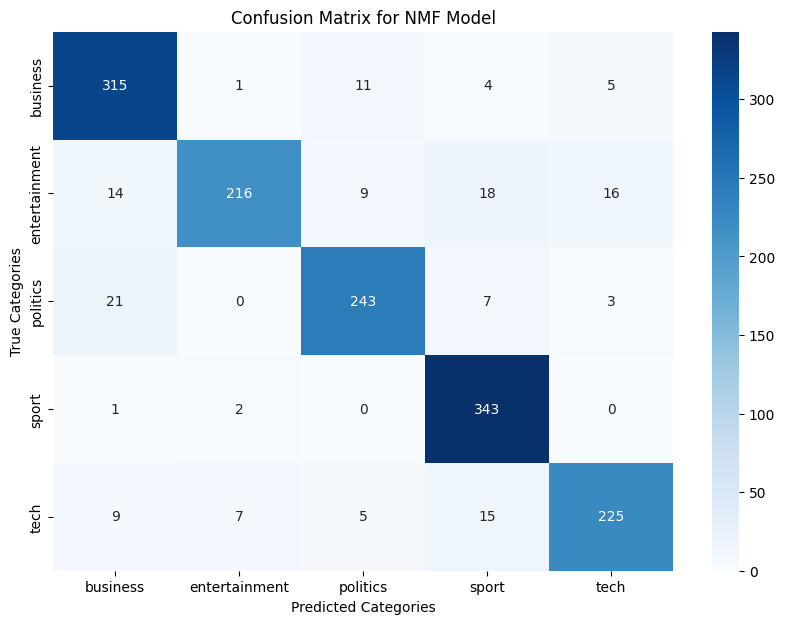

In [60]:
# Create confusion matrix
conf_matrix = confusion_matrix(train_data['Category'], train_predicted_categories)

# Ensure the labels on the confusion matrix are correct
categories = sorted(train_data['Category'].unique())  # Sort the actual categories to match the order
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Categories')
plt.ylabel('True Categories')
plt.title('Confusion Matrix for NMF Model')
plt.show()


In [65]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy on training data
nmf_train_accuracy = accuracy_score(train_data['Category'], train_predicted_categories)

print(f'NMF Model Training Accuracy: {nmf_train_accuracy:.2f}')

NMF Model Training Accuracy: 0.90


The **NMF Model Training Accuracy** is 90%, which indicates that the model performs well in assigning topics to the correct categories. The confusion matrix also provides a visual representation of the performance, showing how well the predicted categories match the actual categories.

#### 4-2. Supervised Learning: Logistic Regression

In this section, I will build a Logistic Regression model for supervised learning. Logistic Regression is a well-known classification algorithm that can be effectively applied to text classification tasks.

#### Why Logistic Regression?

Logistic Regression is a supervised learning algorithm that models the relationship between the input features (in this case, the TF-IDF vectors) and the output categories. It is commonly used for binary and multi-class classification problems because it efficiently handles large datasets and produces interpretable results.

In this context, I will use **Logistic Regression** to directly predict the article categories based on the TF-IDF features extracted from the text.

#### Model Implementation

I will now implement and train the Logistic Regression model using the TF-IDF matrix of the training data.

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(logreg, X_train_tfidf, train_data['Category'], cv=5)

# Print the cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean():.2f}')


Cross-Validation Scores: [0.97986577 0.95302013 0.97651007 0.97986577 0.97651007]
Average Cross-Validation Score: 0.97


#### Model Evaluation

To evaluate the performance of the Logistic Regression model, I will calculate the accuracy on both the training and test datasets, and provide additional metrics such as the confusion matrix and classification report.


Logistic Regression Cross-Validation Accuracy: 0.97
Confusion Matrix (Cross-Validation Training Data):
 [[327   0   5   0   4]
 [  3 267   2   1   0]
 [  9   1 261   1   2]
 [  1   0   0 345   0]
 [  4   3   1   3 250]]
Classification Report (Cross-Validation Training Data):
                precision    recall  f1-score   support

     business       0.95      0.97      0.96       336
entertainment       0.99      0.98      0.98       273
     politics       0.97      0.95      0.96       274
        sport       0.99      1.00      0.99       346
         tech       0.98      0.96      0.97       261

     accuracy                           0.97      1490
    macro avg       0.97      0.97      0.97      1490
 weighted avg       0.97      0.97      0.97      1490



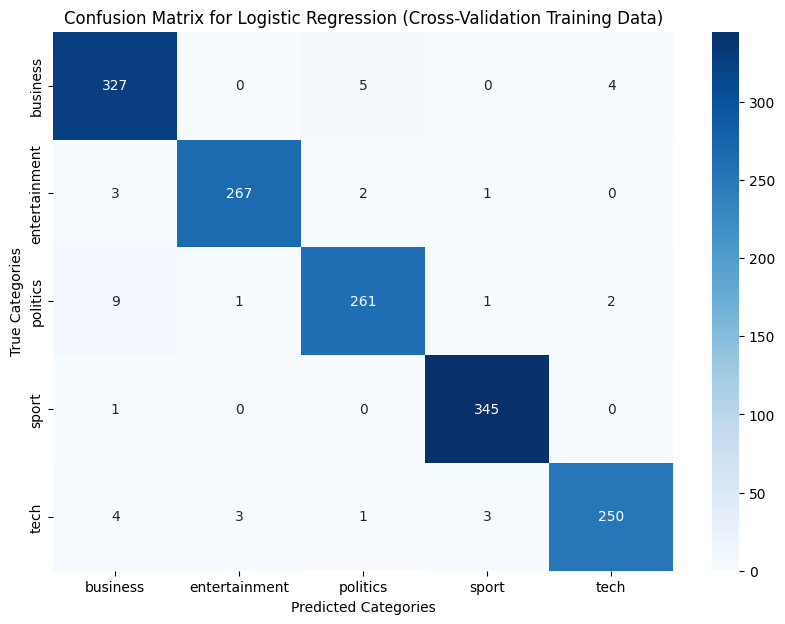

In [82]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Perform 5-fold cross-validation and get predictions on the training data
logreg_cv_predictions = cross_val_predict(logreg, X_train_tfidf, train_data['Category'], cv=5)

# Calculate the accuracy from the cross-validation predictions
cv_train_accuracy = accuracy_score(train_data['Category'], logreg_cv_predictions)

# Print the cross-validation accuracy
print(f'Logistic Regression Cross-Validation Accuracy: {cv_train_accuracy:.2f}')

# Create the confusion matrix and classification report based on cross-validation predictions
conf_matrix_logreg_cv = confusion_matrix(train_data['Category'], logreg_cv_predictions)
class_report_logreg_cv = classification_report(train_data['Category'], logreg_cv_predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix (Cross-Validation Training Data):\n", conf_matrix_logreg_cv)
print("Classification Report (Cross-Validation Training Data):\n", class_report_logreg_cv)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logreg_cv, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Categories')
plt.ylabel('True Categories')
plt.title('Confusion Matrix for Logistic Regression (Cross-Validation Training Data)')
plt.show()


#### Model Performance

The Logistic Regression Cross-Validation Accuracy was 0.97, demonstrating the model's strong performance in predicting the correct article categories.


### Comparison with Unsupervised Learning

- The **Logistic Regression** model significantly outperforms the unsupervised NMF approach in terms of both accuracy and precision. Logistic Regression achieves a cross-validation accuracy of **97%**, while the NMF model reached **90%** training accuracy. This is expected, as **Logistic Regression** directly leverages labeled data to optimize the classification task, whereas NMF relies on discovering hidden patterns without direct access to labels.

- **Supervised Learning** models, like Logistic Regression, benefit from having explicit labels during training. This allows them to learn direct relationships between the input features (TF-IDF vectors) and the target labels. The model is able to fine-tune its predictions based on the labeled data, resulting in higher precision and recall across all categories, as demonstrated in the classification report.

- **Unsupervised Learning (NMF)**, on the other hand, excels in scenarios where labeled data is scarce or unavailable. NMF uncovers latent structures in the data, grouping articles into topics without needing explicit labels. However, this leads to a decrease in accuracy when compared to supervised methods, as the NMF model must infer relationships between words and topics indirectly.

- **Observations**:
    - **Logistic Regression** shows better performance due to its ability to learn from labeled data, achieving high precision, recall, and F1-scores across all categories.
    - **NMF** performs reasonably well for an unsupervised model but lacks the direct supervision needed to fully optimize classification performance, especially in distinguishing closely related categories.

| Model                               | Training Accuracy | Key Strengths                                             |
|-------------------------------------|-------------------|-----------------------------------------------------------|
| **NMF (Unsupervised)**              | 90%               | Useful for discovering hidden patterns in unlabeled data  |
| **Logistic Regression (Supervised)**| 97%               | Leverages labeled data for highly accurate predictions    |

- The **NMF** approach remains useful in situations where labeled data is unavailable or costly to obtain. It can provide insights into underlying topics and patterns in the data. However, when labeled data is available, as in this case, **Logistic Regression** and other supervised learning models should be preferred due to their superior performance in tasks like classification.


### 5. Conclusion

In this project, I compared **Supervised Learning** (Logistic Regression) and **Unsupervised Learning** (NMF) for classifying news articles based on their textual content. The results clearly demonstrate that **Logistic Regression**, a supervised learning approach, significantly outperforms NMF in terms of accuracy, precision, and overall classification performance. The ability of **Logistic Regression** to leverage labeled data allows it to model direct relationships between features (TF-IDF vectors) and target labels, resulting in a **97% cross-validation accuracy** compared to NMF's **90% training accuracy**.

However, **NMF** remains a valuable technique, particularly in situations where labeled data is limited or unavailable. NMF successfully uncovered latent topics within the data, which can provide useful insights when direct supervision is not feasible. The NMF approach demonstrated reasonable performance given that it did not have access to labeled data during training, but its accuracy and precision were naturally lower compared to Logistic Regression.

#### Key Takeaways:
- **Logistic Regression** excels in classification tasks where labeled data is available. It achieved high accuracy and robust performance across all categories due to its ability to explicitly learn from labeled examples.
- **NMF** is effective for discovering hidden patterns and topics in the data when labels are scarce, but its classification performance is inherently limited by the lack of supervision.

#### Future Directions:
- Future work could explore **hybrid models** that combine the strengths of both supervised and unsupervised approaches. For example, **semi-supervised learning** could be investigated, where a small amount of labeled data is used alongside a large amount of unlabeled data to improve model performance.
- Additionally, applying these methods to other datasets with varying amounts of labeled data could help assess how well these techniques generalize to different domains.
- Another avenue for exploration is the use of **deep learning-based approaches** (such as neural networks) for text classification, which may offer further improvements in accuracy and generalization, particularly for large-scale datasets.

In conclusion, while supervised learning methods like Logistic Regression are optimal when labeled data is abundant, unsupervised methods like NMF offer valuable alternatives in data-scarce environments. A combination of both approaches may prove to be the most effective strategy in real-world applications where data availability and labeling costs vary.
